In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [12]:
def loss_own(y, x, volume, period, desv_stop=3.1, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_stop_loss, residue = loss_own_residue(y_test, x_test, period, desv_stop=desv_stop, y_short=y_short)
    return -abs(((price_input_test*volume)-(price_stop_loss*volume)))

def loss_own_residue(y, x, period, desv_stop=3.1, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price + penny
        else:
            y_test[0] = last_price - penny

        residue = mult.zscore(mult.residue(y_test, x_test, period))
        if(abs(residue[0]) >= desv_stop):
            break
    return y_test[0], residue

def gain_own(y, x, volume, period, price_input_test=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    volume = abs(volume)
    if (price_input_test <= 0):
        price_input_test=y_test[0]
    
    price_take_profit, residue = gain_own_residue(y_test, x_test, period, y_short=y_short)
    return abs(((price_input_test*volume)-(price_take_profit*volume)))

def gain_own_residue(y, x, period, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    last_price = y_test[0].copy()
    penny = 0
    while (True):
        penny=round(penny + 0.01, 2)
        if (y_short):
            y_test[0] = last_price - penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] <= 0):
                break
        else:
            y_test[0] = last_price + penny
            residue = mult.zscore(mult.residue(y_test, x_test, period))
            if(residue[0] >= 0):
                break

    return y_test[0], residue

In [13]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [14]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-28
data: (309, 72)
pairs: (1931, 12)


In [15]:
data

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,BRAP4,...,SUZB3,TAEE11,TIMP3,TOTS3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-28,15.090000,21.520000,65.230003,35.029999,21.420000,23.520000,28.070000,14.74000,84.870003,42.919998,...,42.000000,29.000000,14.880000,25.950001,19.500000,7.99,60.340000,50.970001,20.410000,67.190002
2020-07-27,15.280000,20.709999,66.230003,34.910000,21.580000,23.680000,28.490000,14.08000,87.709999,43.639999,...,41.669998,28.639999,14.570000,26.240000,19.389999,8.09,61.369999,49.750000,18.910000,69.949997
2020-07-24,14.930000,20.540001,65.349998,33.950001,20.719999,22.639999,28.000000,14.00000,86.400002,41.340000,...,42.299999,28.420000,14.410000,26.360001,19.150000,7.55,58.599998,49.270000,19.540001,66.709999
2020-07-23,14.400000,20.950001,65.519997,34.349998,20.879999,22.500000,27.870001,14.00000,87.400002,40.970001,...,40.740002,28.170000,14.770000,26.230000,19.150000,7.31,58.849998,49.580002,19.799999,66.980003
2020-07-22,14.710000,21.680000,66.699997,35.200001,21.139999,22.830000,28.330000,14.27000,89.199997,41.400002,...,39.500000,28.340000,16.129999,26.299999,19.730000,7.51,59.240002,51.500000,21.290001,68.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-08,17.920000,37.000000,34.349998,50.590000,30.980000,35.490002,27.430000,8.56450,39.849998,30.580000,...,41.279999,26.389999,10.950000,39.425098,21.730000,8.58,49.000000,45.750000,4.530000,18.610001
2019-05-07,17.650000,35.279999,33.660000,49.490002,27.518200,31.609100,27.580000,8.55466,40.099998,30.980000,...,40.990002,26.070000,11.470000,40.822399,21.400000,8.46,49.700001,45.849998,4.720000,18.139999
2019-05-06,18.059999,35.000000,33.700001,49.369999,30.700001,34.990002,28.520000,8.72182,40.299999,30.760000,...,41.330002,25.950001,11.430000,42.020199,21.260000,8.78,49.660000,45.509998,4.560000,18.360001


In [16]:
"""y_symbol = 'ELET3'
x_symbol = 'PCAR3'"""

"""y_symbol = 'CMIG4'
x_symbol = 'ENGI11'"""

y_symbol = 'BRKM5'
x_symbol = 'LAME4'

y = data[y_symbol]
x = data[x_symbol]

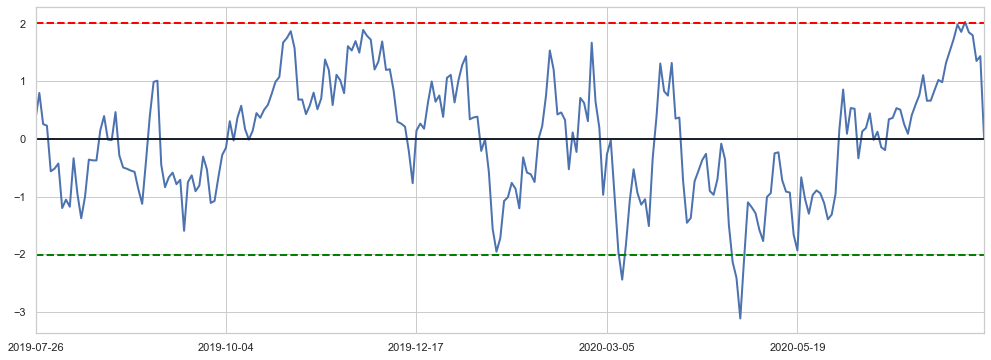

In [17]:
y_rest, resid = gain_own_residue(data['BBAS3'], data['TAEE11'], 250)
mult.plot_residue(resid)

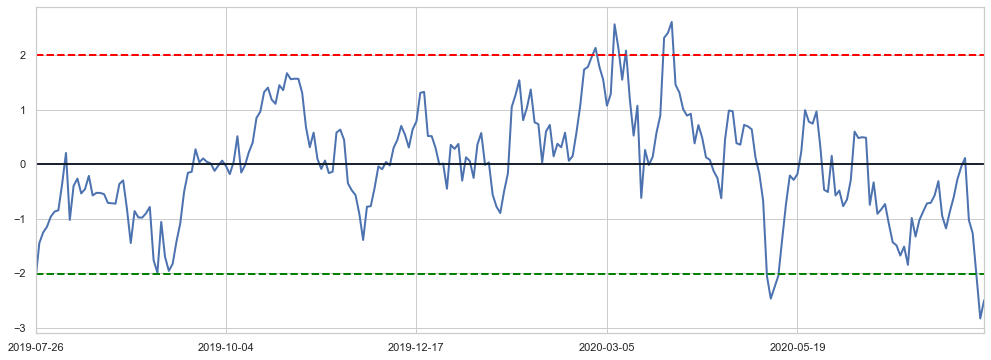

In [18]:
residues = mult.zscore(mult.residue(data['BRML3'], data['GGBR4'], 250))
mult.plot_residue(residues)

In [19]:
residues[0]

-2.492853305720975

In [20]:
mult.analysis_by_periods(data['ENBR3'], data['FLRY3'])

,Period,Stationary,Std,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Model
0,100,True,1.186238,-5.271308,99,0.474657,2,0.740175,MRLS
1,120,True,1.395825,-5.634394,99,0.519453,2,0.739293,MRLM
2,140,True,1.527721,-5.762541,99,0.543143,2,0.730490,MRLM
3,160,True,1.455492,-5.521138,99,0.546765,2,0.715851,MRLM
4,180,True,1.088525,-5.331924,99,0.558711,3,0.707090,MRLM
5,200,True,1.274851,-5.402499,99,0.545392,3,0.701913,MRLM
6,220,True,1.436103,-4.964320,99,0.528102,3,0.695520,MRLM
7,240,True,1.567049,-4.248684,99,0.502186,5,0.685547,MRLM
8,250,True,1.614250,-4.595682,99,0.494299,5,0.683500,MRLM


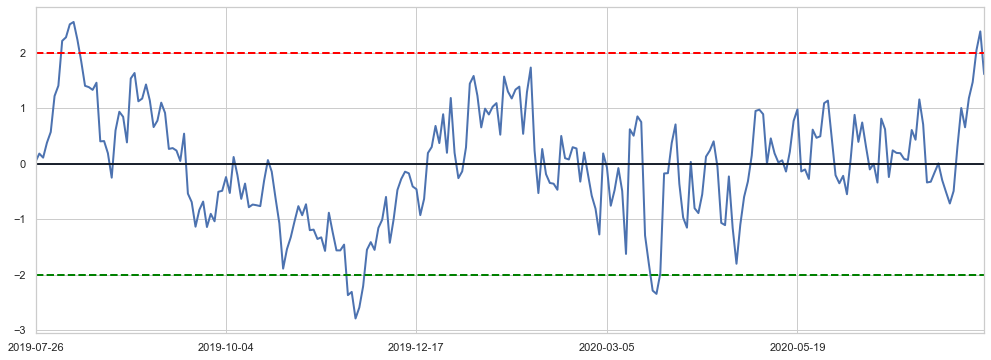

In [21]:
mult.plot_residue(mult.residue(data['ENBR3'], data['FLRY3'], 250))

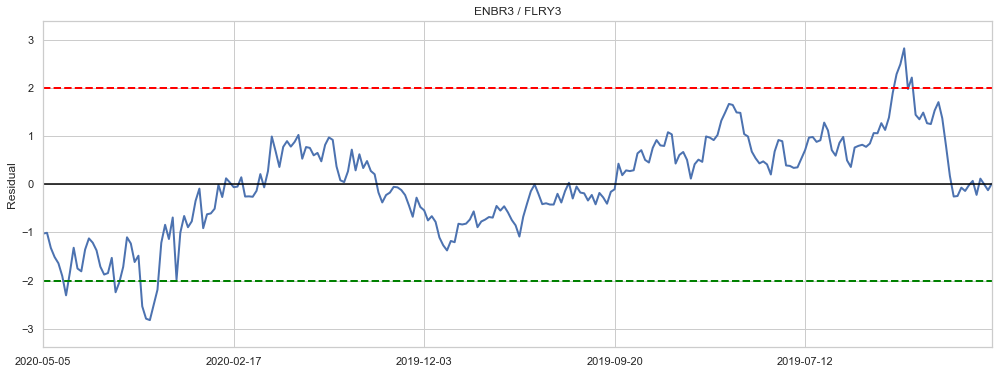

In [22]:
coint.show(data, 'ENBR3', 'FLRY3', 250)

In [23]:
EGIE3 = pd.read_csv('datasets/series_historicas/EGIE3.csv')
TIMP3 = pd.read_csv('datasets/series_historicas/TIMP3.csv')

In [24]:
EGIE3

,<DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0,2020.01.02\t10:00:00\t51.00\t51.24\t50.82\t51....
1,2020.01.02\t10:15:00\t51.11\t51.28\t51.01\t51....
2,2020.01.02\t10:30:00\t51.23\t51.46\t51.17\t51....
3,2020.01.02\t10:45:00\t51.41\t51.45\t51.32\t51....
4,2020.01.02\t11:00:00\t51.44\t51.59\t51.43\t51....
...,...
4133,2020.07.28\t11:00:00\t44.65\t44.65\t44.45\t44....
4134,2020.07.28\t11:15:00\t44.52\t44.63\t44.51\t44....
4135,2020.07.28\t11:30:00\t44.60\t44.64\t44.55\t44....
4136,2020.07.28\t11:45:00\t44.55\t44.61\t44.55\t44....


In [25]:
import yfinance as yf
tickers = "ABEV3.SA BRFS3.SA"
dados = yf.download(tickers=tickers, period="2y")['Adj Close']

[*********************100%***********************]  2 of 2 completed


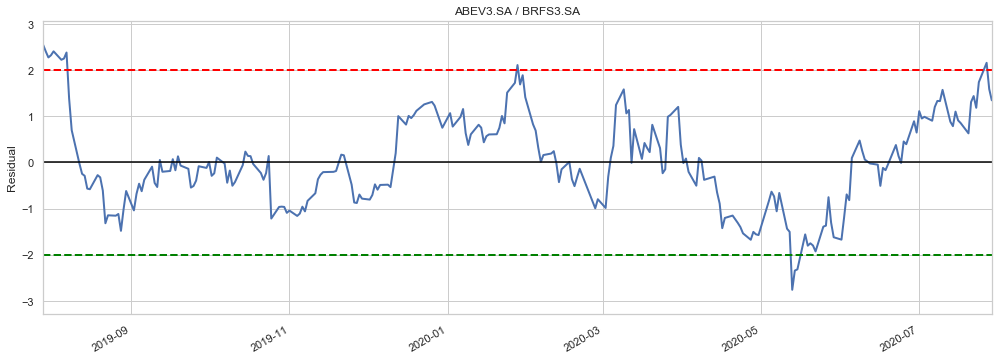

In [26]:
coint.show(dados, 'ABEV3.SA', 'BRFS3.SA', 250)

In [27]:
y, x = coint.getvalues_by_period(dados['ABEV3.SA'], dados['BRFS3.SA'], 250)
coint.check_halflife(y, x)

9

No handles with labels found to put in legend.


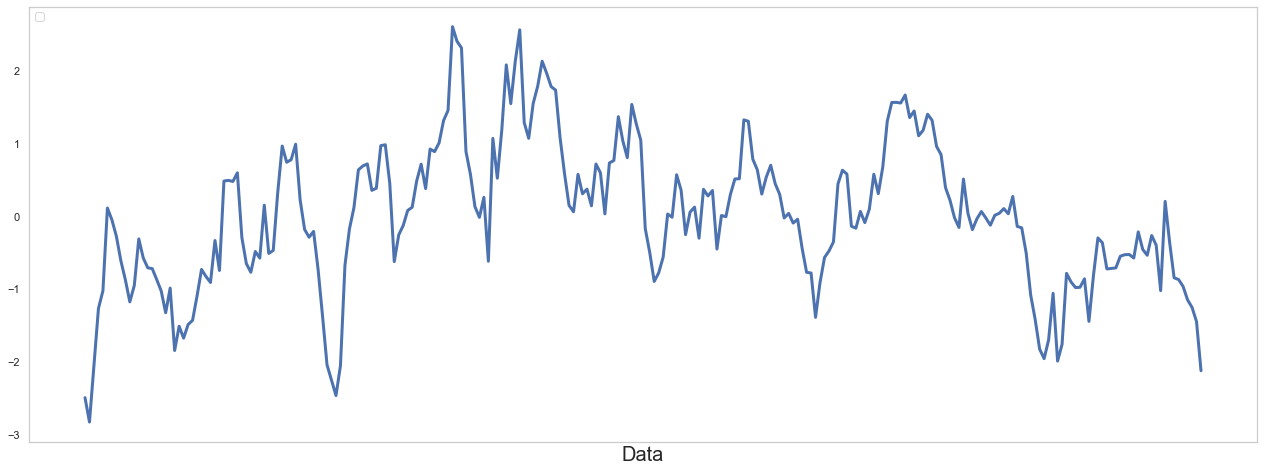

In [62]:
import matplotlib.dates as mdates

plt.figure(figsize=(22,8))
plt.plot(residues, linewidth=3)

plt.xticks(residues.index.tolist())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Data', size=20)
plt.show()

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(residues, label='Residuo')
plt.xticks(residues.index.tolist())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.grid()
plt.show()